# Medical Cost Personal Insurance Project

# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns    

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance



Predict : Can you accurately predict insurance costs?


Dataset Link-

https://github.com/dsrscientist/dataset4

https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploratory Data Analysis (EDA)

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are 3 different type of data(int64,float,object )present in the dataset.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


This gives the brief about the dataset which includes indexing type, columns,no null values and memory usage.

In [15]:
extra = df[df.duplicated()]
extra.shape

(1, 7)

In [16]:
print ("Total Duplicate Rows are", df.duplicated().sum)

Total Duplicate Rows are <bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool>


In [17]:
print ("Total Duplicate Rows are", df.duplicated().sum())

Total Duplicate Rows are 1


In [18]:
df.shape

(1338, 7)

# Checking for missing values

In [19]:
#checking the null values- Missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

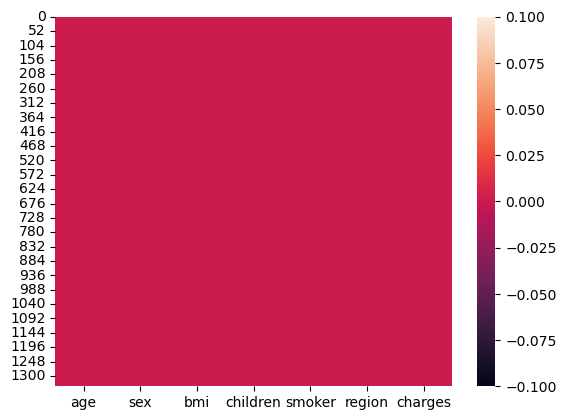

In [20]:
sns.heatmap(df.isnull())

we can clearly visualize that there is no missing data present.

In [21]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [22]:
# Checking the values counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n") 

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

These are the values counts of all columns and we dont find any blank in column

In [23]:
df['charges'].nunique()

1337

# Let's see graphically the distribution 

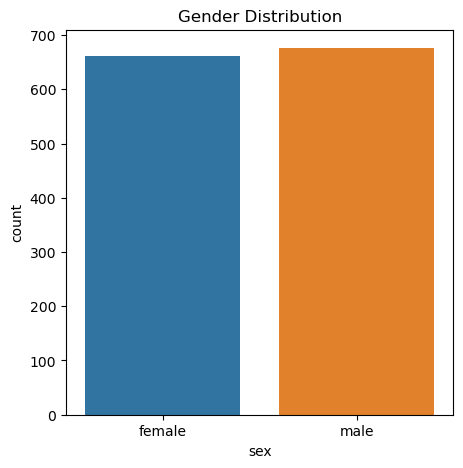

In [27]:
plt.figure(figsize =(5,5))
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')
plt.show()

Counting number of males and females

In [50]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [28]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

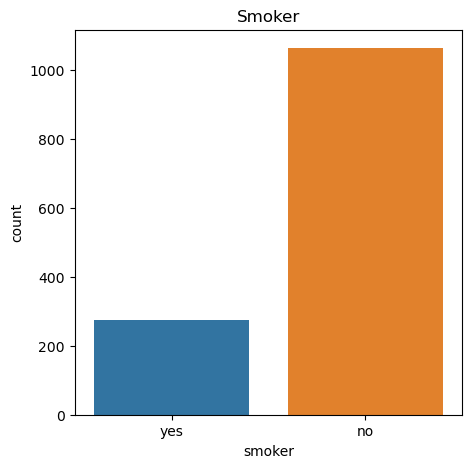

In [30]:
plt.figure(figsize =(5,5))
sns.countplot(x='smoker',data=df)
plt.title('Smoker')
plt.show()

Which region people are applying for insurance

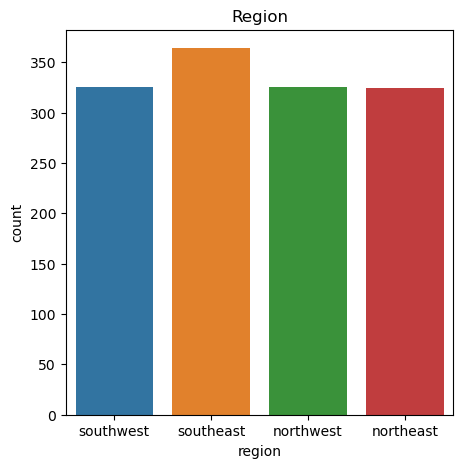

In [31]:
plt.figure(figsize =(5,5))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

<Figure size 500x500 with 0 Axes>

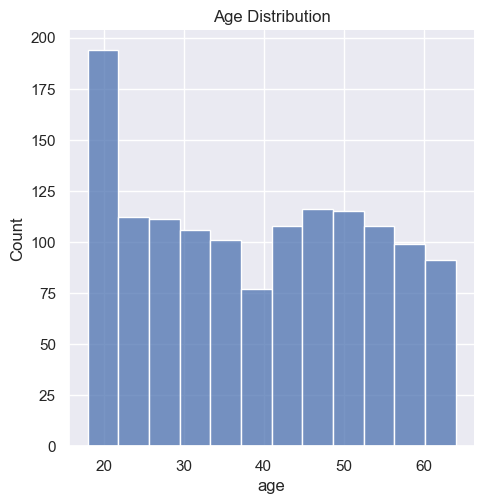

In [43]:
sns.set()
plt.figure(figsize =(5,5))
sns.displot(x='age',data=df)
plt.title('Age Distribution')
plt.show()

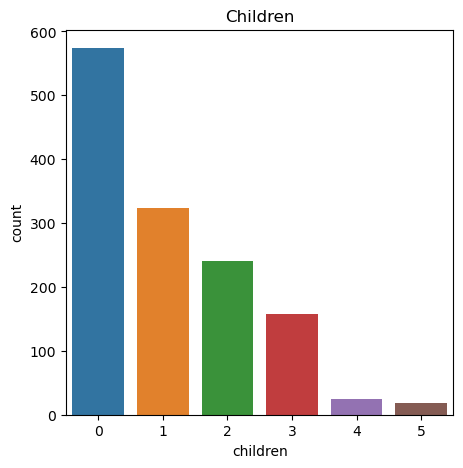

In [33]:
plt.figure(figsize =(5,5))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

In [49]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

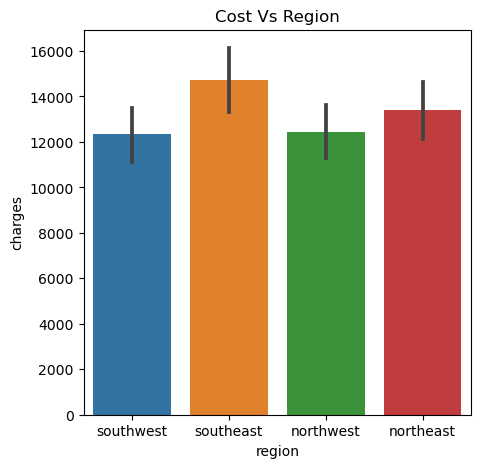

In [39]:
plt.figure(figsize =(5,5))
sns.barplot(x='region',y='charges',data=df)
plt.title('Cost Vs Region')
plt.show()


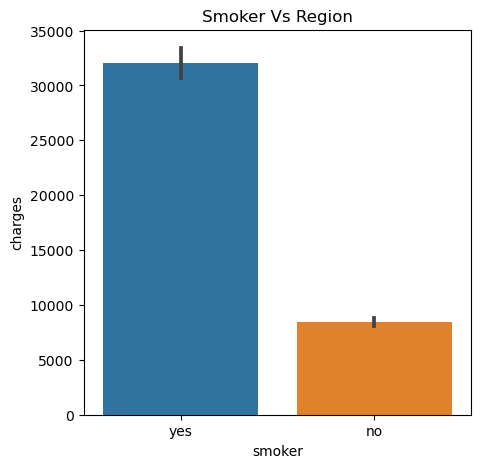

In [40]:
plt.figure(figsize =(5,5))
sns.barplot(x='smoker',y='charges',data=df)
plt.title('Smoker Vs Region')
plt.show()

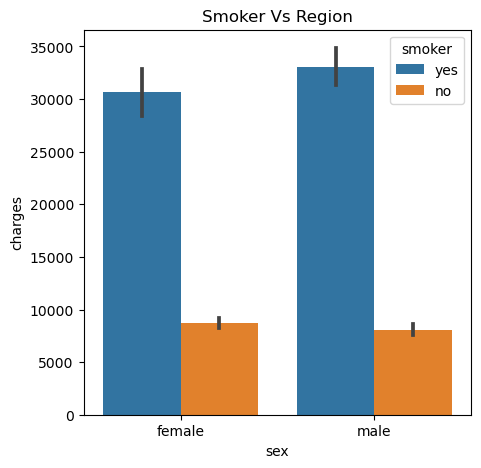

In [41]:
plt.figure(figsize =(5,5))
sns.barplot(x='sex',y='charges',hue='smoker' ,data=df)
plt.title('Smoker Vs Region')
plt.show()

<AxesSubplot:xlabel='region', ylabel='charges'>

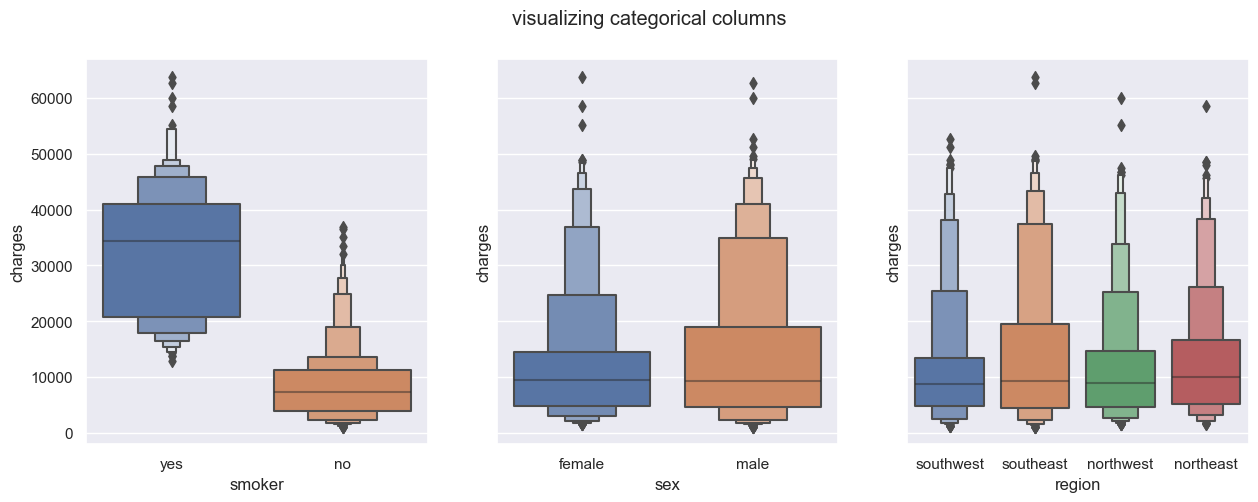

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('visualizing categorical columns')
sns.boxenplot(x='smoker',y='charges',data=df,ax=axes[0])
sns.boxenplot(x='sex',y='charges',data=df,ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df,ax=axes[2])

In [ ]:
Only numerical distribution data

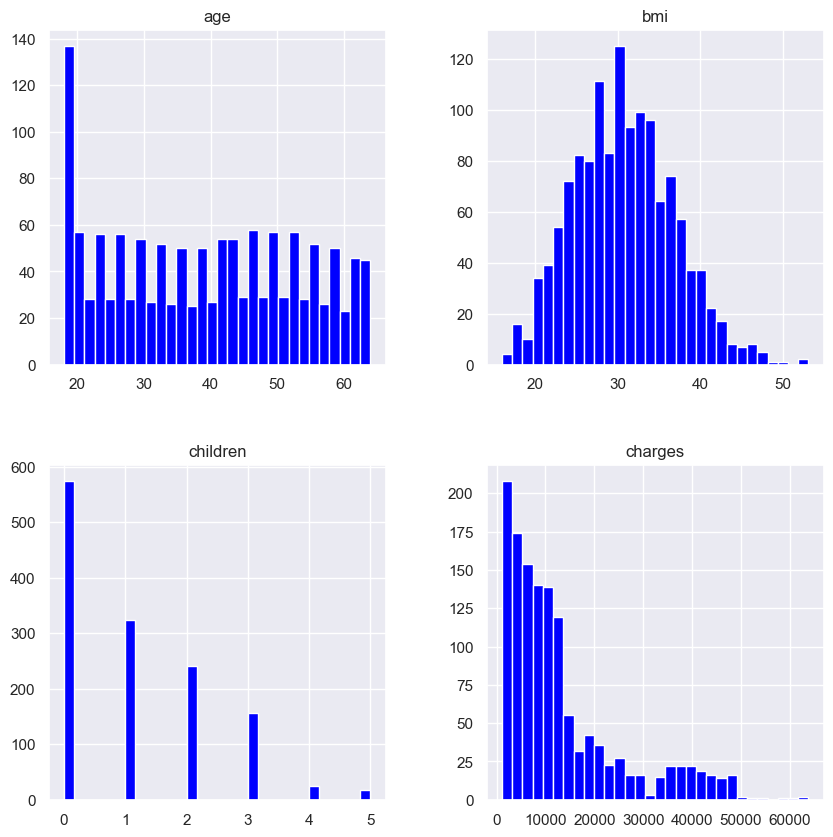

In [58]:
df[['age', 'bmi', 'children', 'charges']].hist(figsize=(10, 10), bins=30, color='blue')


plt.show()

# Data Preprocessing

# Converting Categorical Features to Numerical

Encoding categorical columns here

In [67]:
# Encoding categorical columns using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


2 more way also we can convert data into integers

Here we can see float values are present by default fit encode in the float vlaue.

we have converted the categorical columns into numerical columns using Ordinal Encoding method

In [60]:
df['sex'].value_counts() # 1 is male, 0 =female

1.0    676
0.0    662
Name: sex, dtype: int64

In [61]:
df['smoker'].value_counts() # smoker no-1064 ,yes-274

0.0    1064
1.0     274
Name: smoker, dtype: int64

In [66]:
df['region'].value_counts() # southeast -2, southwest 3, northwest -325 -1,northeast -324 -0

2.0    364
3.0    325
1.0    325
0.0    324
Name: region, dtype: int64

In [63]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [64]:
# Checking the values counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


1.0    676
0.0    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


0.0    1064
1.0     274
Name: smoker, dtype: int64


2.0    364
3.0    325
1.0    325
0.0    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.084

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.3 KB


# Describing the Data

In [69]:
# Statistical summary of numerical

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


This gives the statistical informed of the numerical columns. The summary of the dataset looks perfect since there is no negative/invalid values present.

From the above description we can absoerve the following:-

1) The counts of all the columns are same which means there are no missing values in the dataset.

2) The means value is greater than the median(50%) in age,bmi and Children, changes which means the data is skewed to right in these

3) The means value is less than the median(50%) in sex,region, changes which means the data is skewed to left in these

3) By summarizing the data we can observe there is huge differeces between 75% and max hence there are outliers present in the data.

4) We can also notice the standard deviation, min,25% percantile values from this describe method

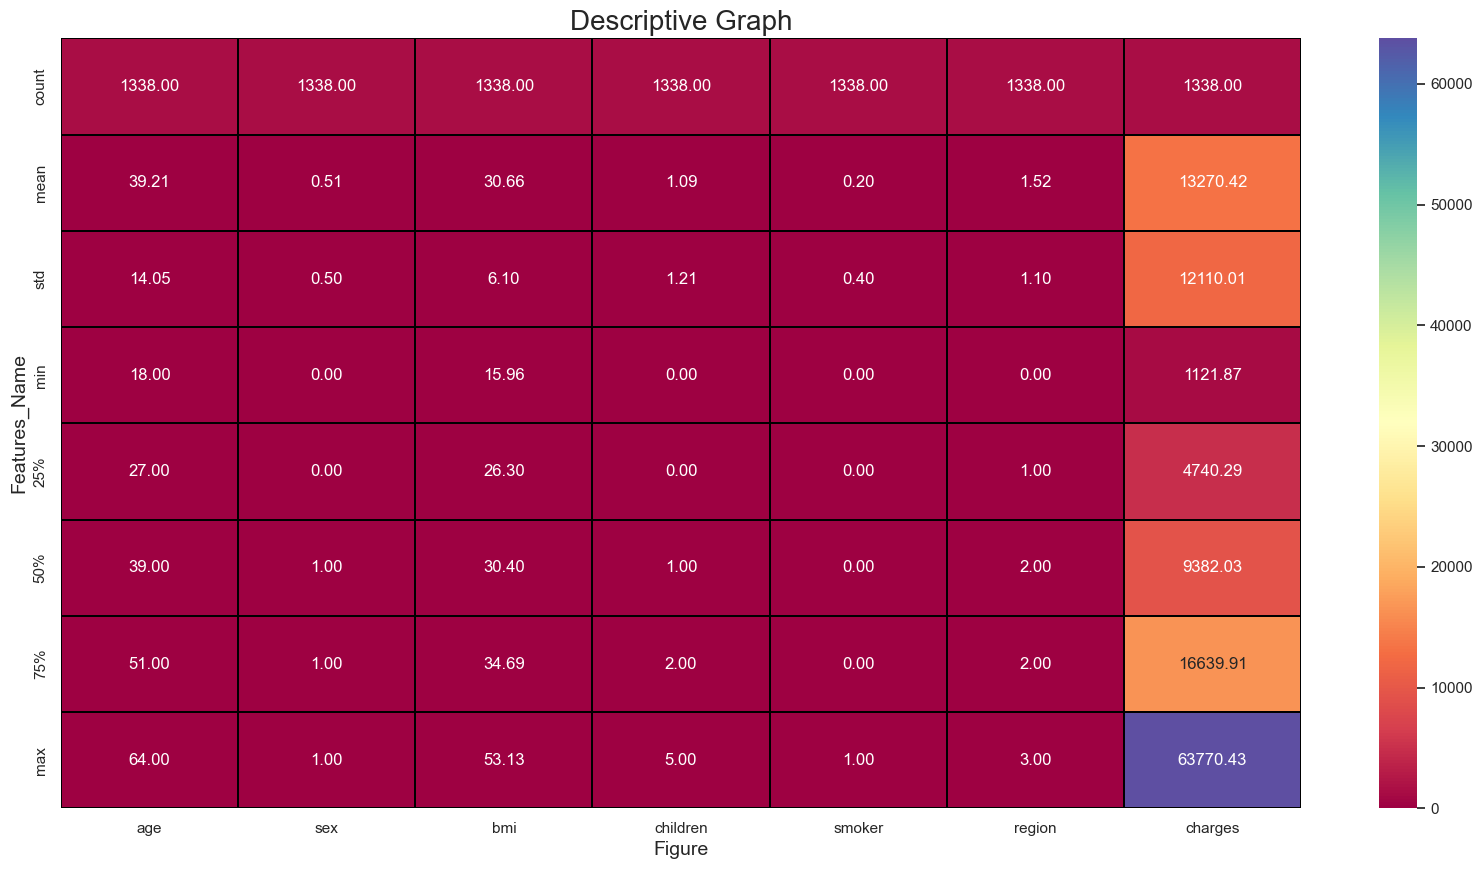

In [71]:
plt.figure(figsize =(20,10))
sns.heatmap(df.describe(), annot =True, fmt ='0.2f',linewidth = 0.2, linecolor ='black',cmap = 'Spectral')
plt.xlabel ('Figure', fontsize =14)
plt.ylabel('Features_Name',fontsize =14)
plt.title('Descriptive Graph',fontsize =20)
plt.show()

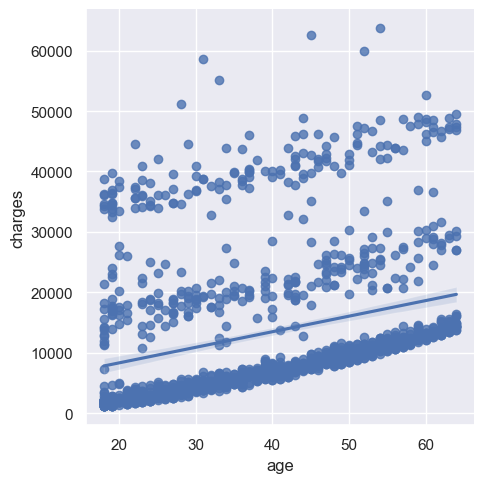

In [73]:
sns.lmplot(x = 'age', y='charges', data =df,palette ='colorblind')

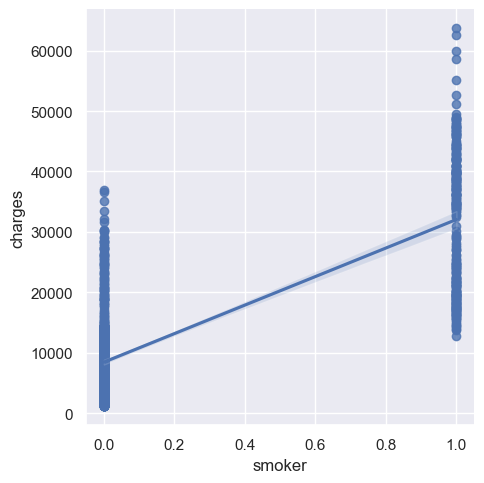

In [74]:
sns.lmplot(x = 'smoker', y='charges', data =df,palette ='colorblind')

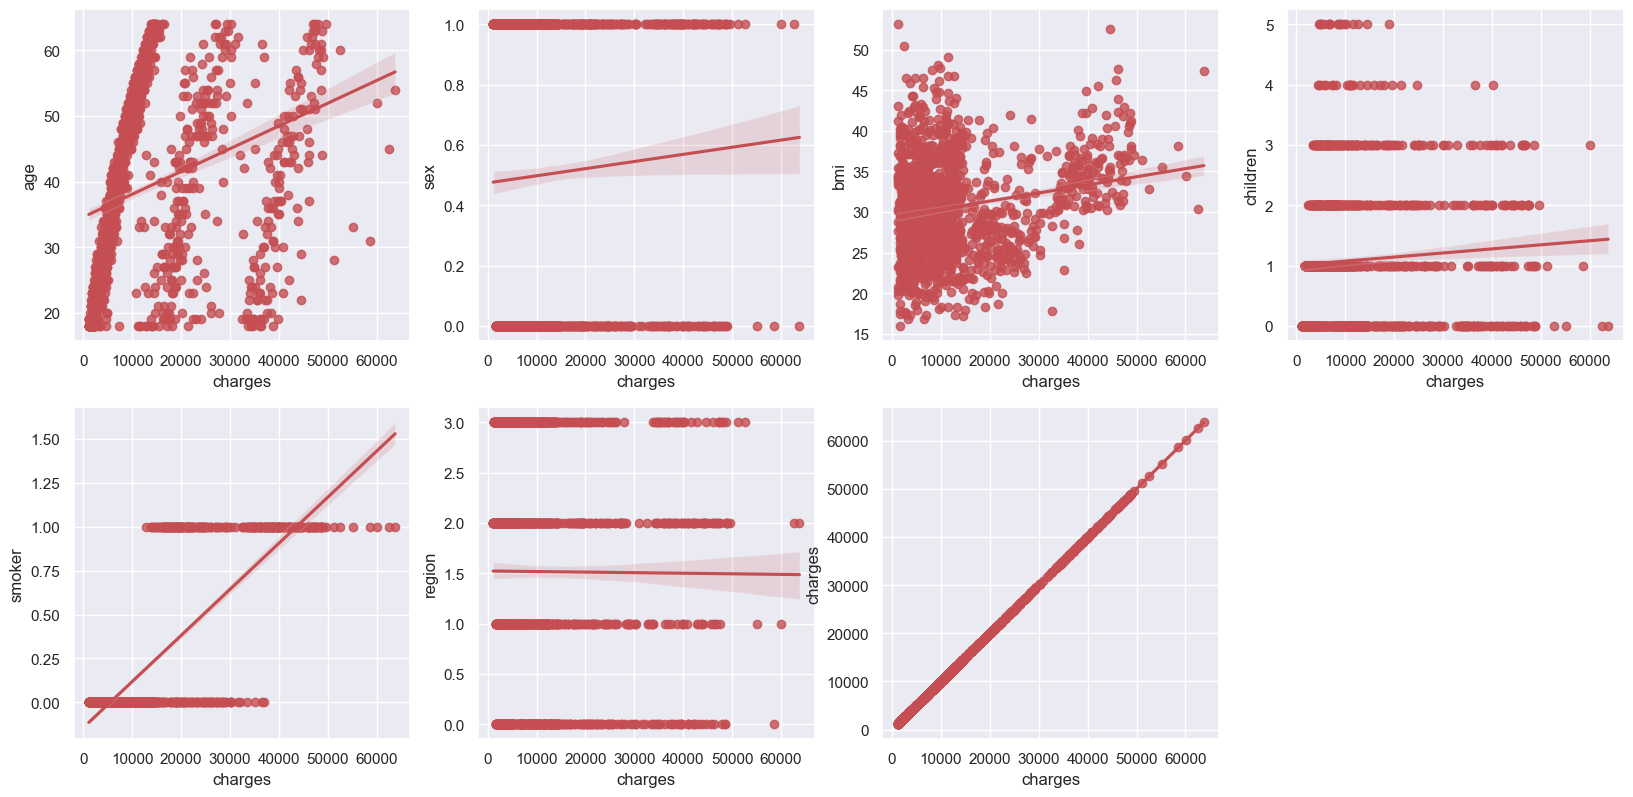

In [76]:
plt.figure(figsize =(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='charges', y=i,data =df,color='r')
        plt.xlabel("charges")
        plt.ylabel(i)
    p+=1
    
plt.show()

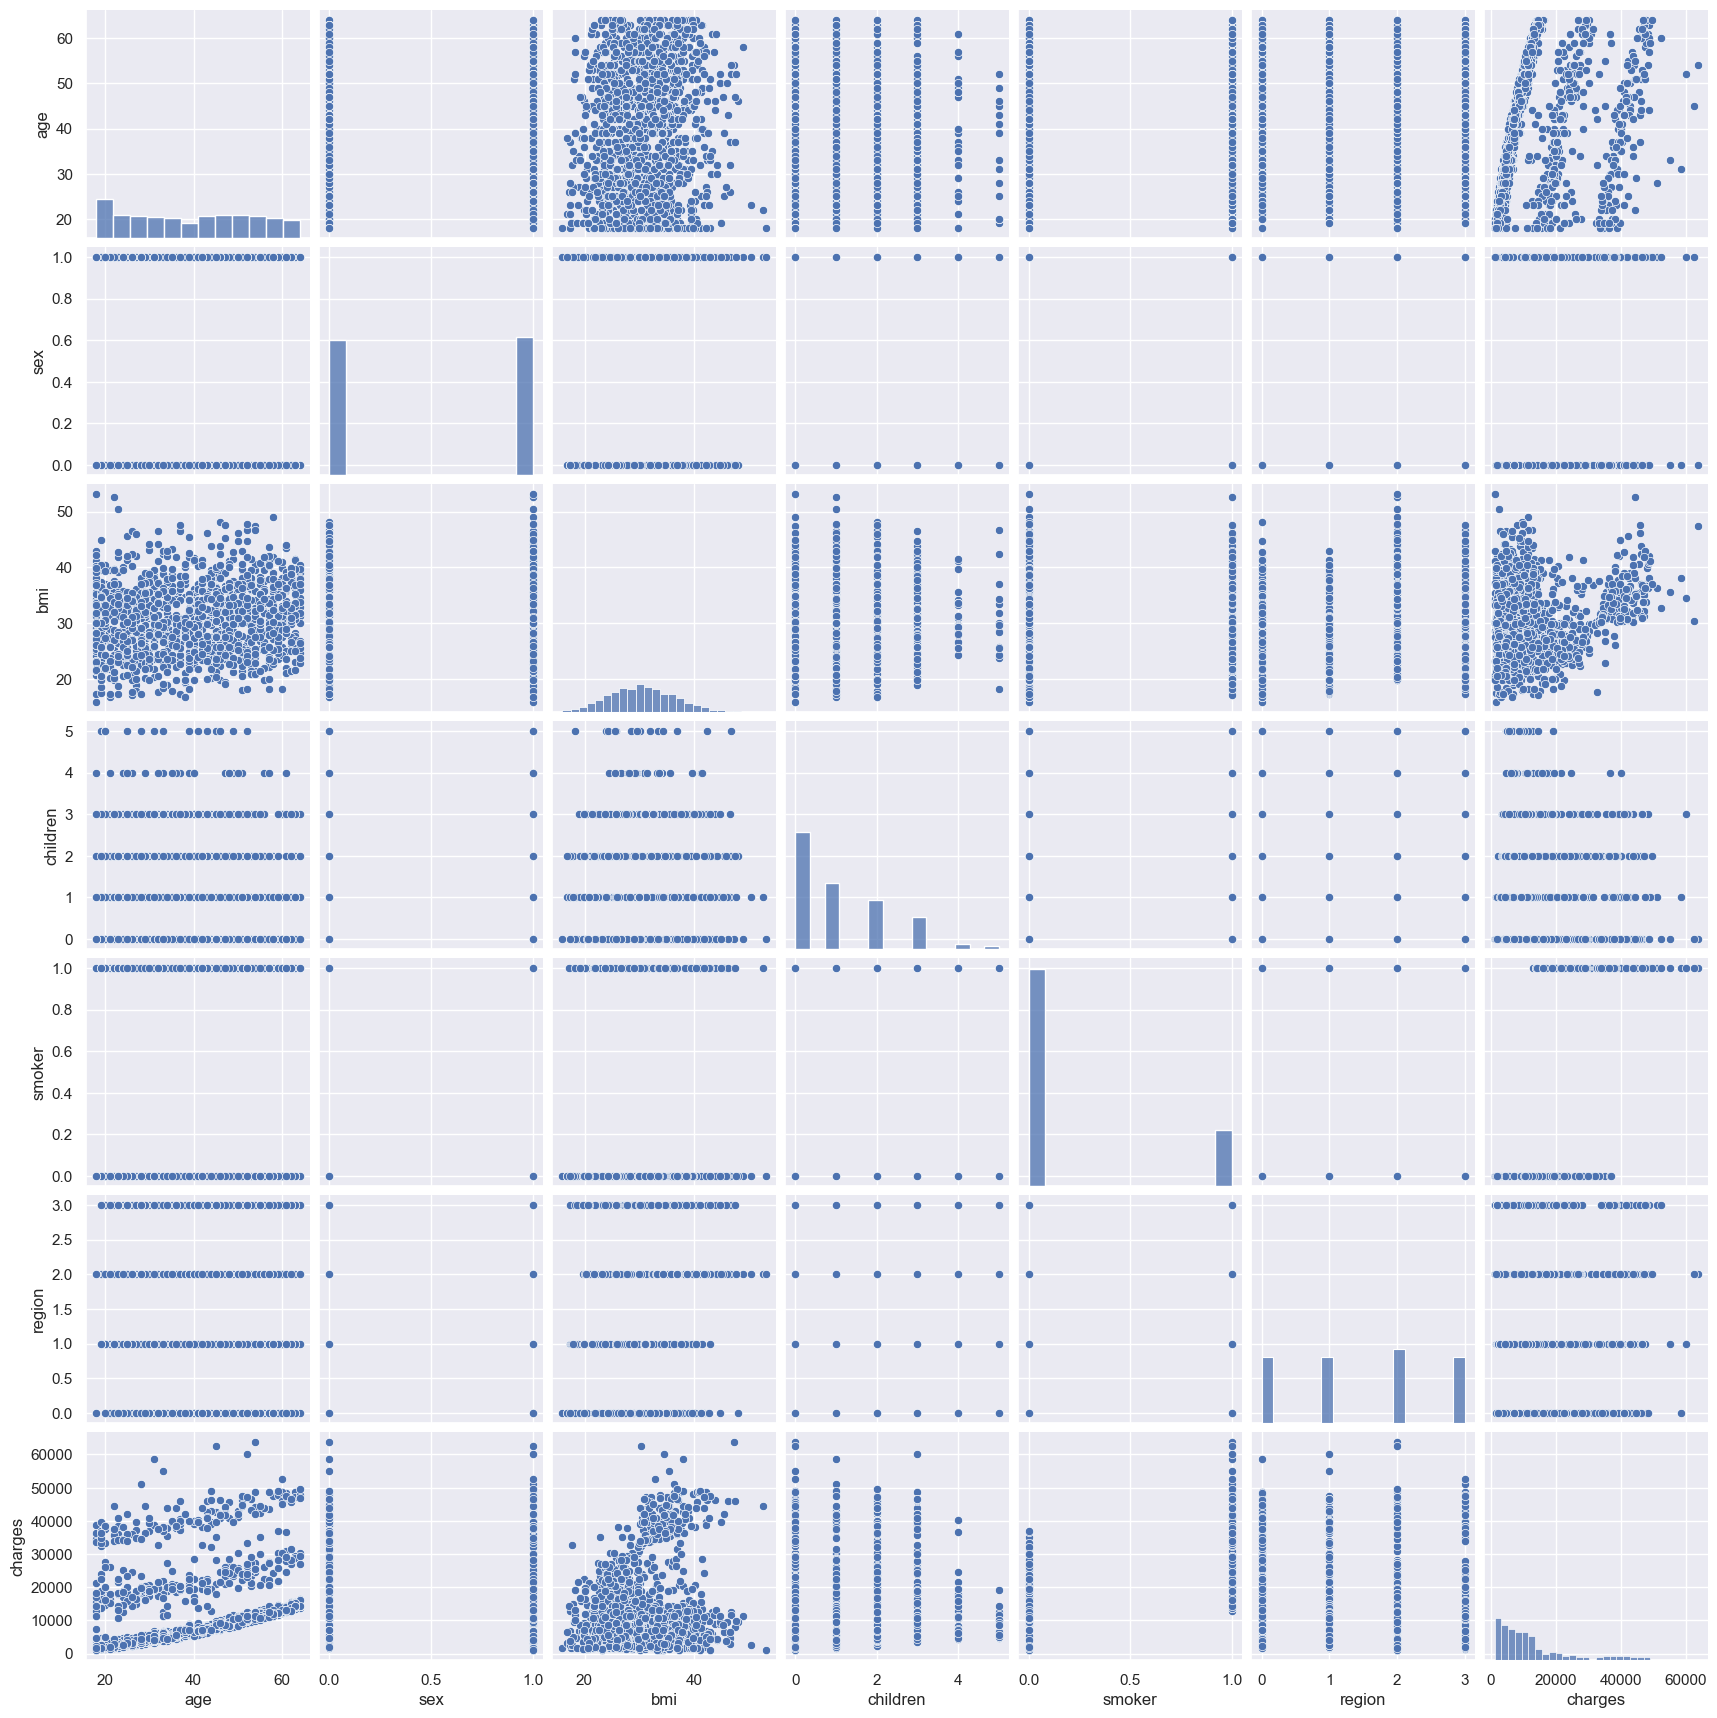

In [77]:
sns.pairplot(data=df,palette ="Dark2")

# Outliers

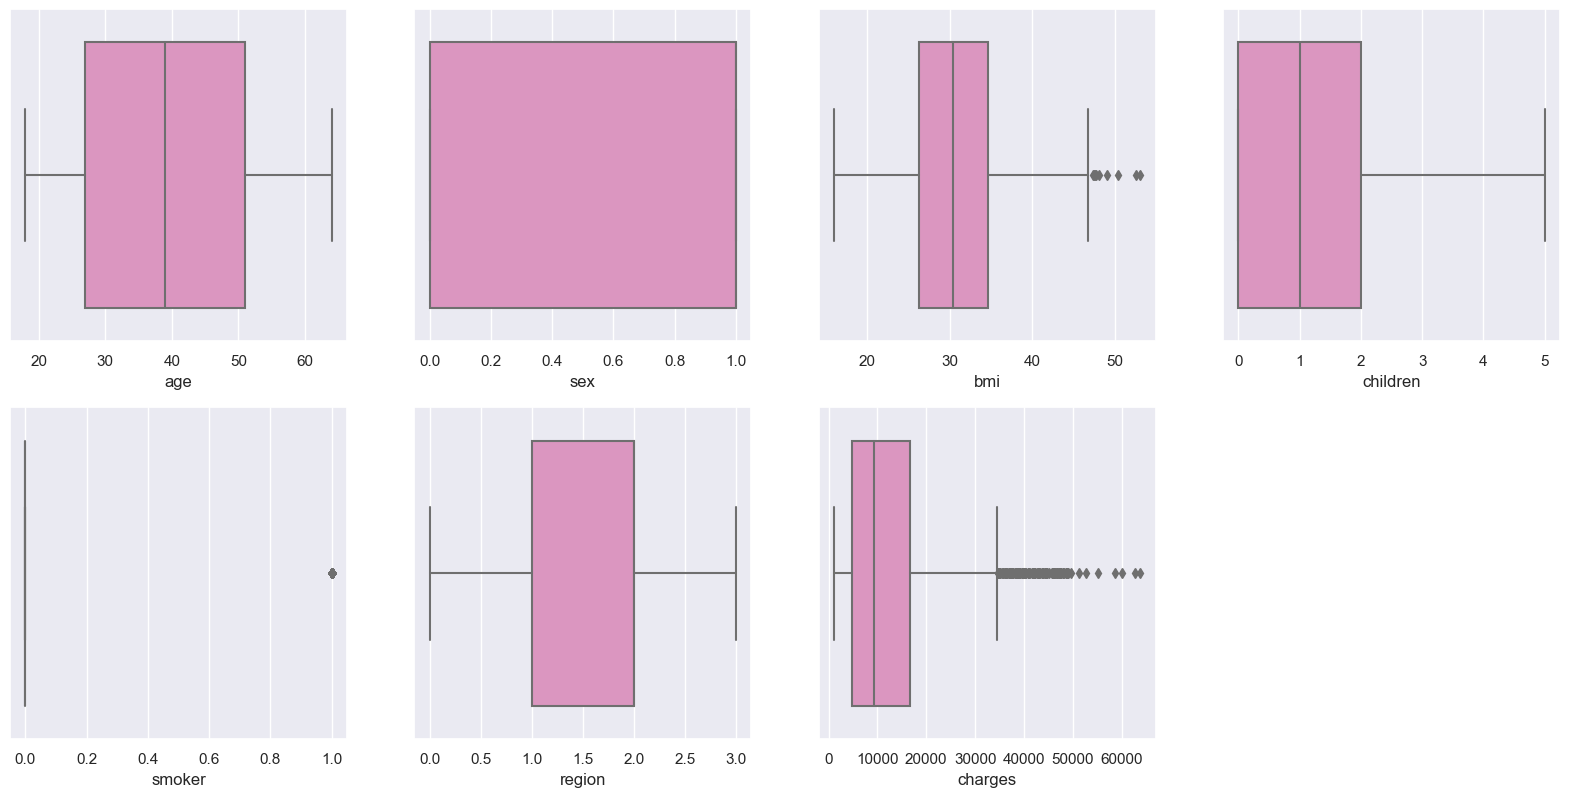

In [78]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
    p+=1
    

plt.show()


So we have found outlier in all Columns

So, removing the outlier using Zscore and IQR tecniues before building the model and selected best one.

<AxesSubplot:>

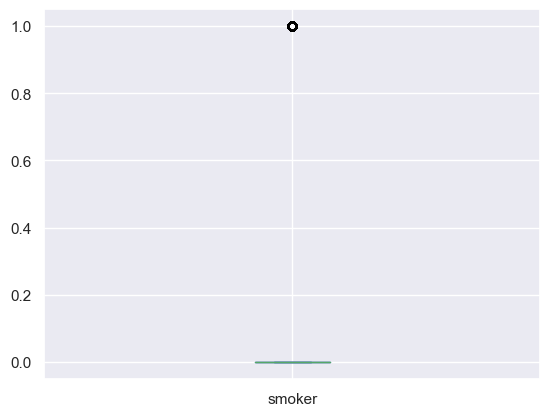

In [79]:
df['smoker'].plot.box()

<AxesSubplot:>

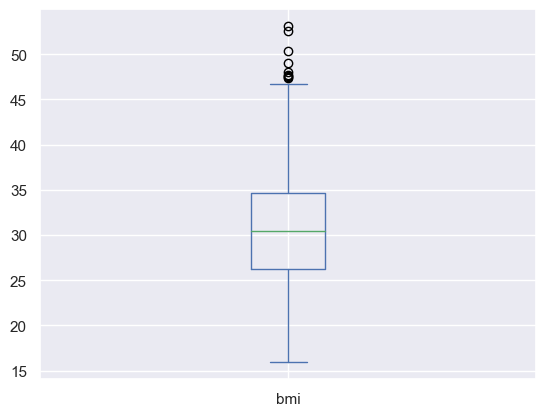

In [80]:
df['bmi'].plot.box()

<AxesSubplot:>

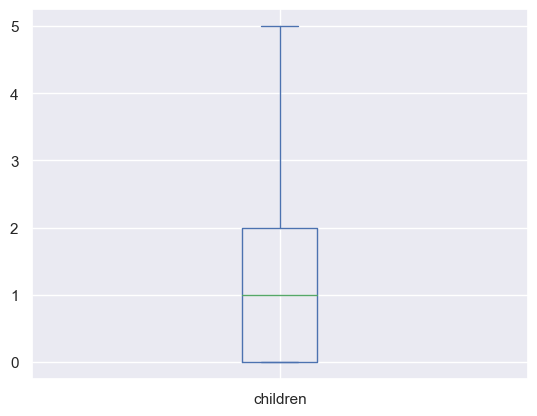

In [81]:
df['children'].plot.box()

<AxesSubplot:>

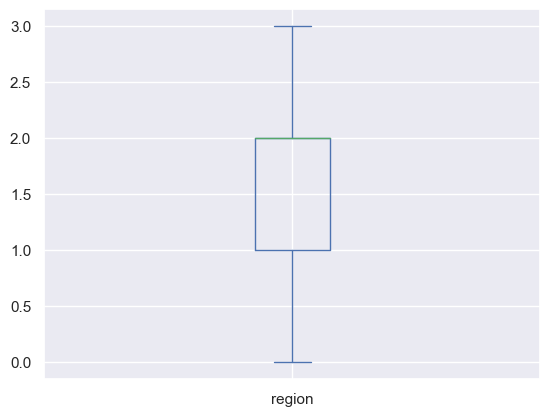

In [82]:
df['region'].plot.box()

In [ ]:
from scipy.stats import zscore
out_features =df[['bmi']]
z=np.abs(zscore(out_features))
z

In [ ]:
# threshold = 3
np.where(z>3)

# Checking how the data has been distributed in each column

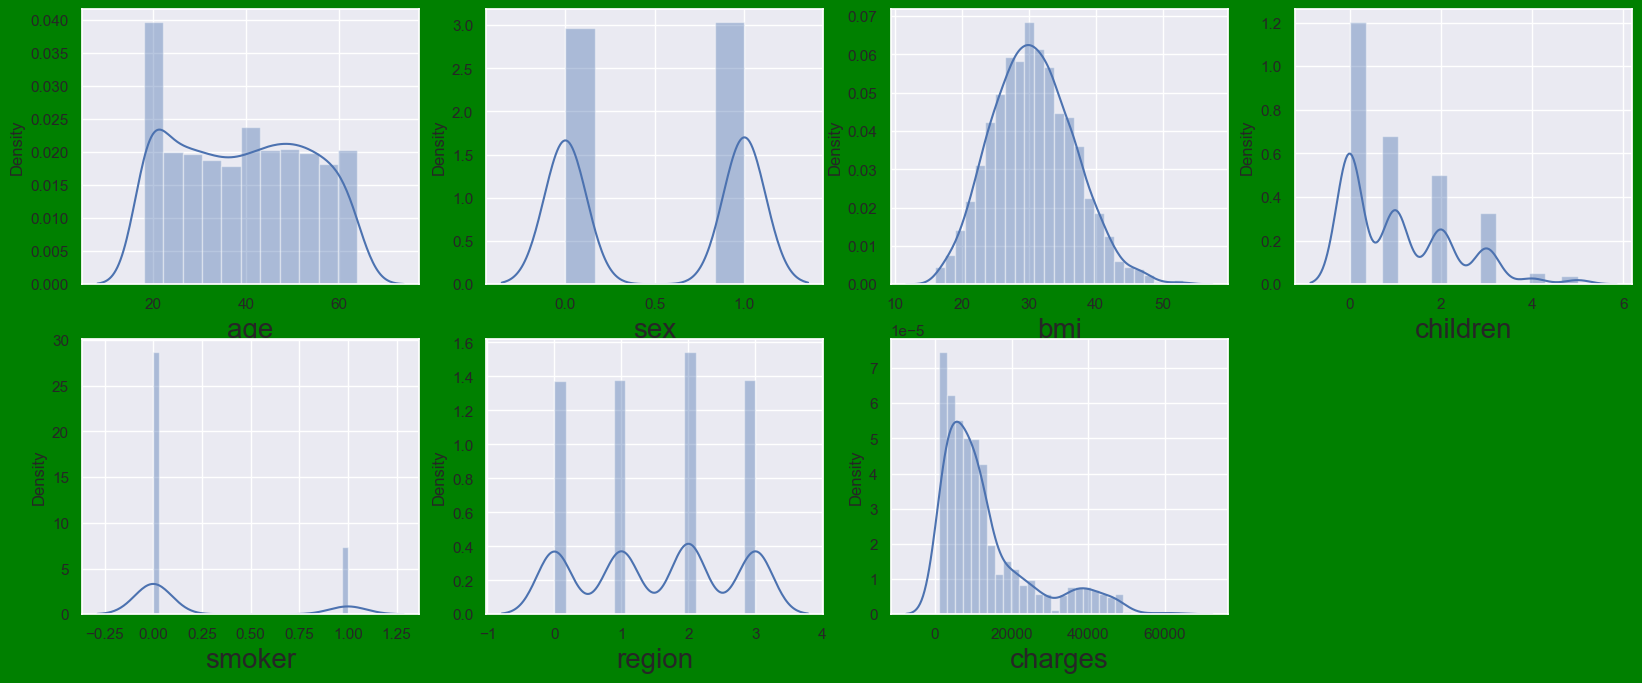

In [83]:
plt.figure(figsize=(20,25) , facecolor ='green')

plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color ='b')
        plt.xlabel(column,fontsize =20)
    plotnumber+=1
plt.show()

# Checking for Skewness

In [84]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

So By default, skewness values is acceptable skewness value is negative 0.5 to positive +0.5 Here my volume not that range.

# Removing skewness

In [87]:
# Removing skewness using cuberoot method

df['smoker'] = np.cbrt(df['smoker'])

We have removed the skewness using cube root method.

In [88]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

# Correlation between target variable and independent variables¶

In [89]:
# Checking the correlation between feature and the target
cor = df.corr()
cor 

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


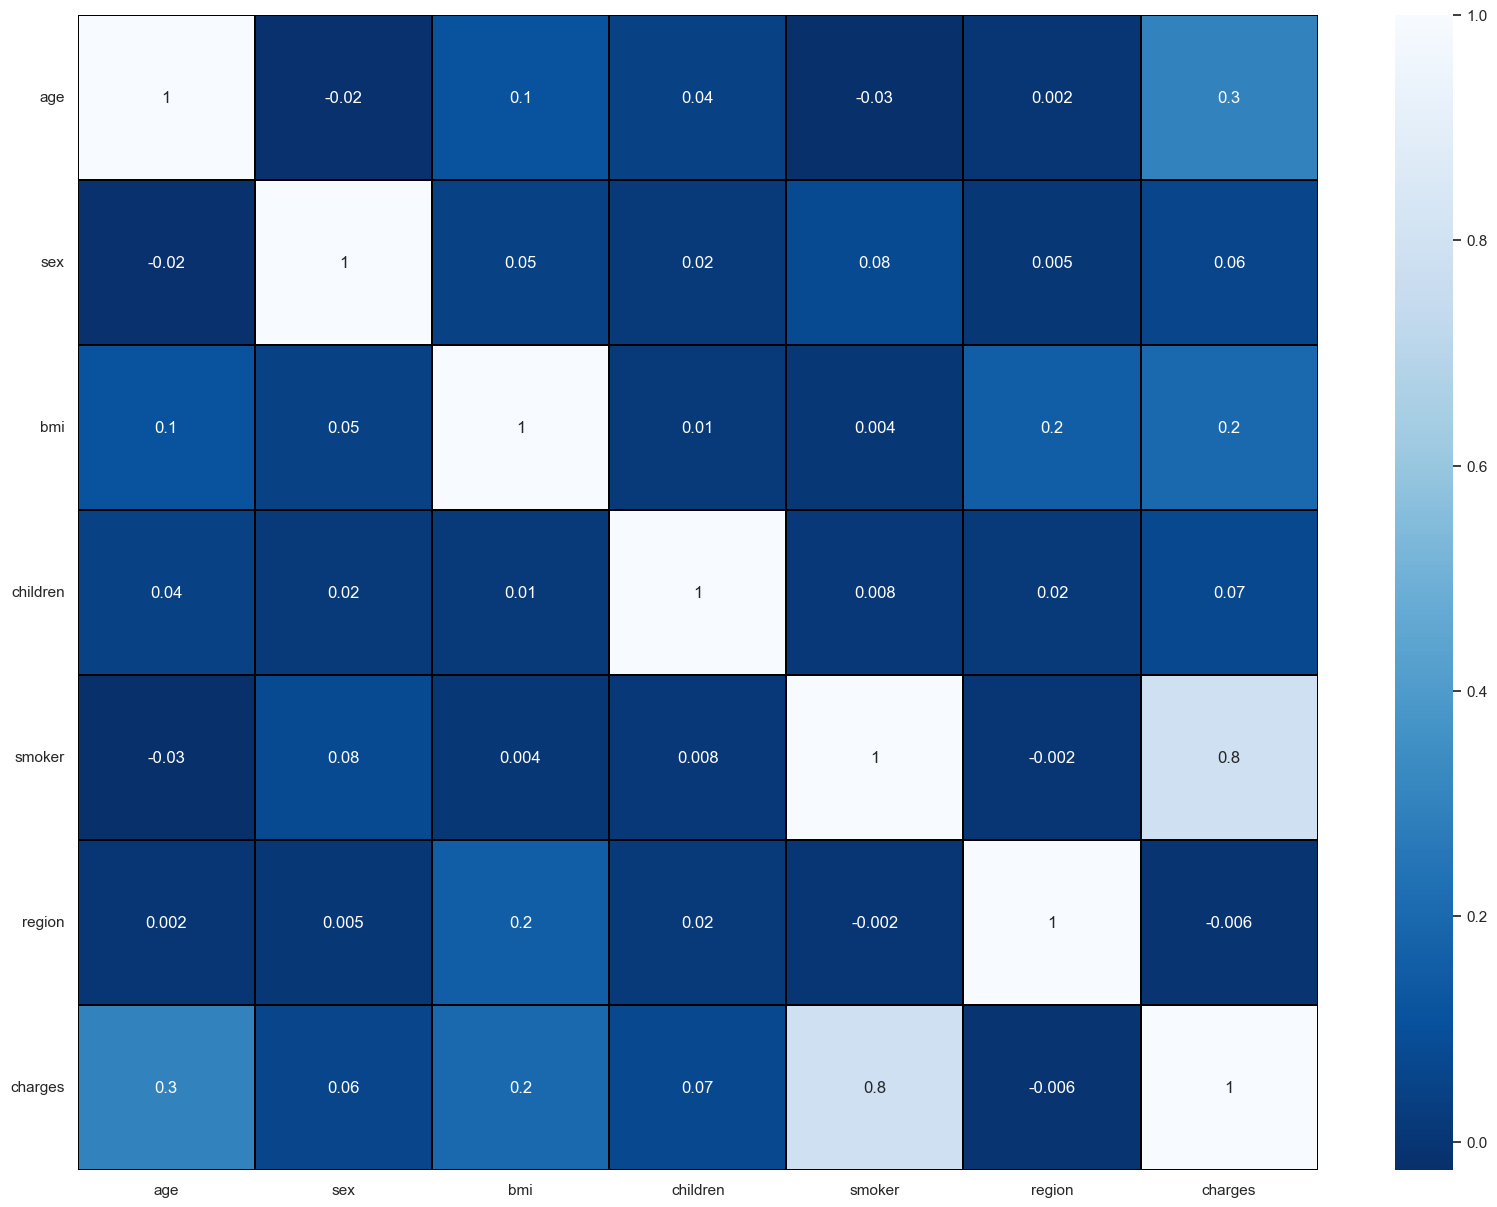

In [90]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt=".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

Smoker, BMI and Age are most important factor that determnines - Charges

Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlatio

In [92]:
print(df['sex'].value_counts().sort_values()) 
print(df['smoker'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

0.0    662
1.0    676
Name: sex, dtype: int64
1.0     274
0.0    1064
Name: smoker, dtype: int64
0.0    324
3.0    325
1.0    325
2.0    364
Name: region, dtype: int64


Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

Text(0, 0.5, 'Count')

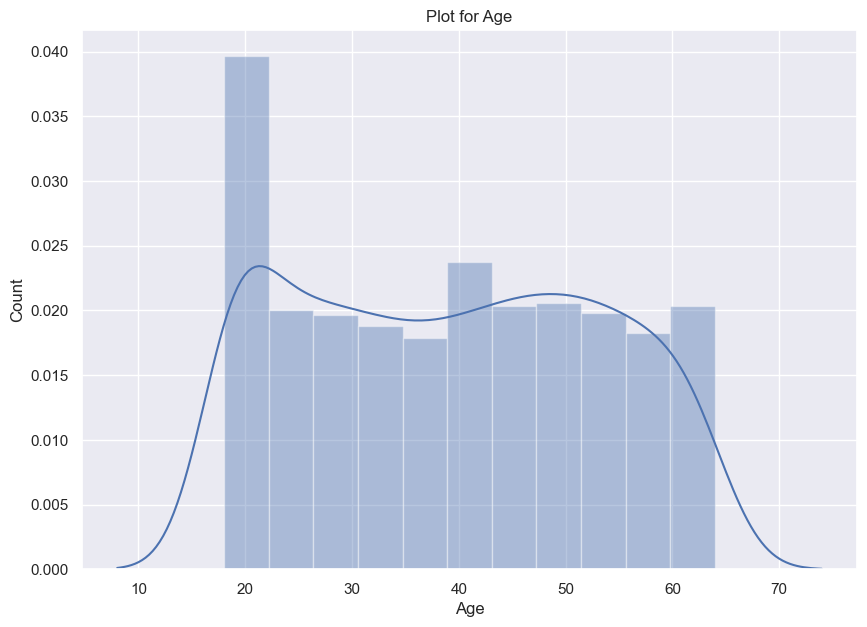

In [94]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

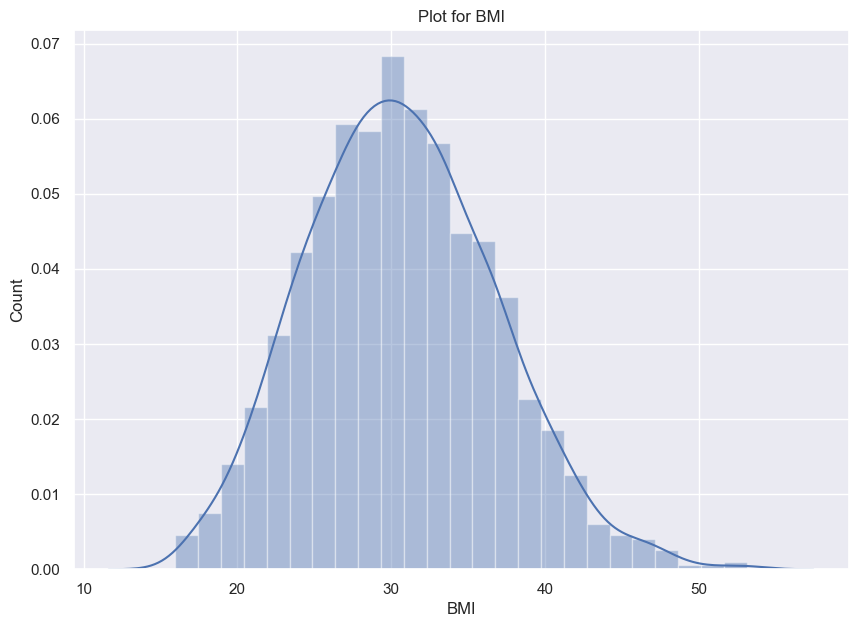

In [95]:
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

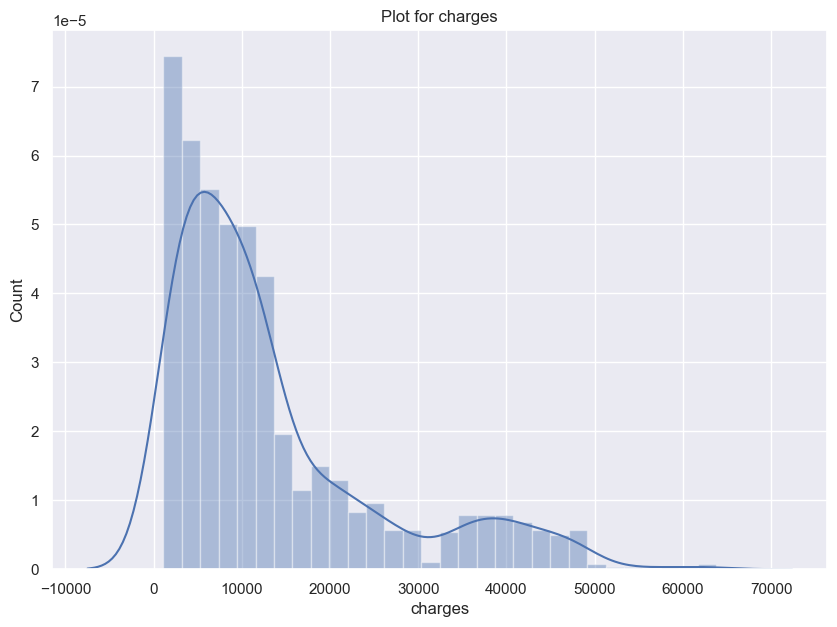

In [96]:
plt.figure(figsize=(10,7))
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

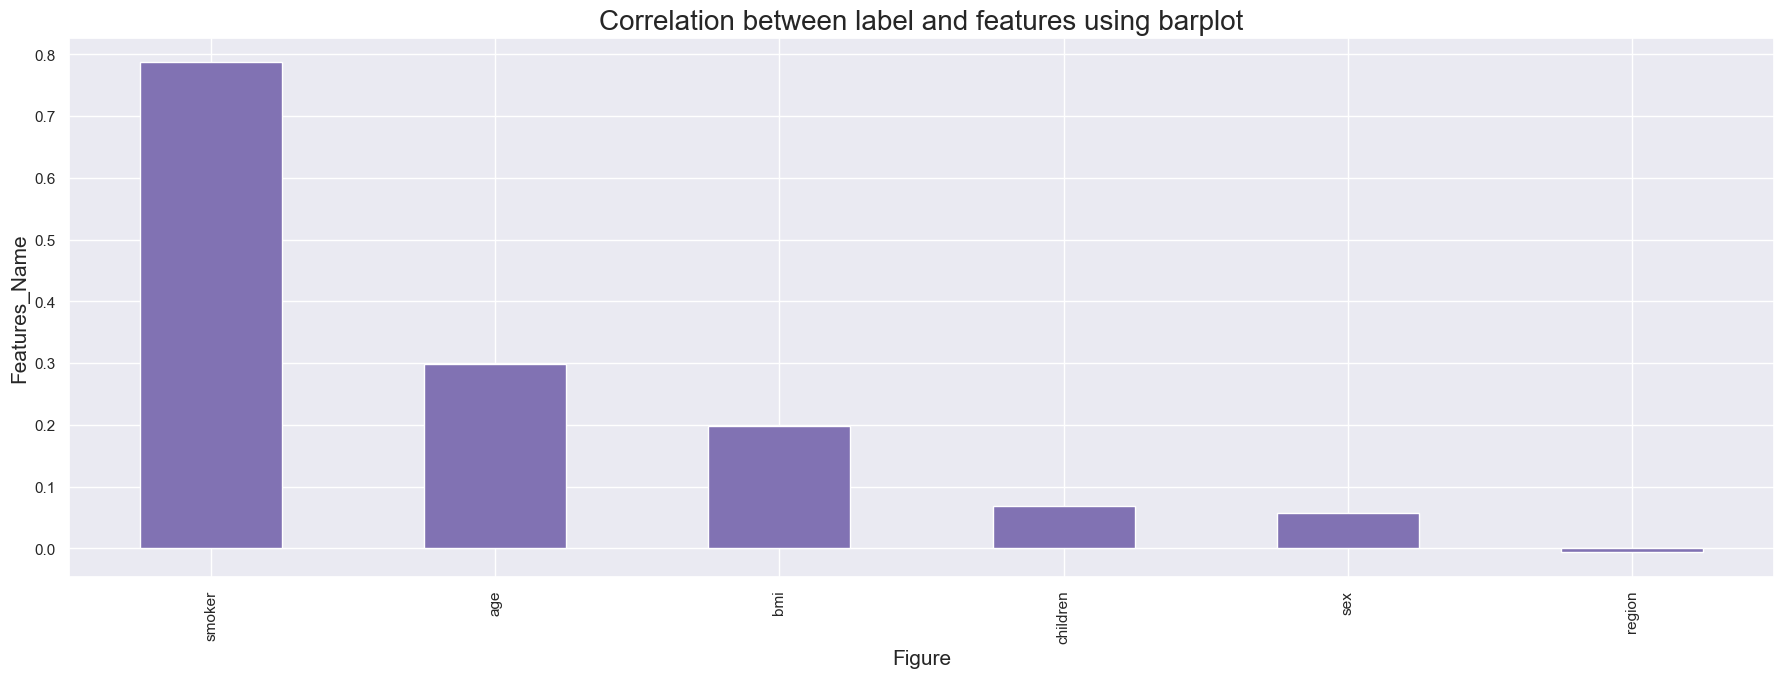

In [97]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind = 'bar', color="m")
plt.xlabel('Figure', fontsize =15)
plt.ylabel('Features_Name',fontsize =15)
plt.title('Correlation between label and features using barplot', fontsize =20)
plt.show()

There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!

# Prepating data - We can scale before proceeding with Prediction

In [99]:
# Separating the independent and target variables into X and Y

x = df.drop("charges", axis =1)
y= df['charges']

print("Features Dimension =",x.shape)
print('Label Dimension =', y.shape)

Features Dimension = (1338, 6)
Label Dimension = (1338,)


independent and dependent valriable dimension shoild be equal.

# Feature Scaling using Standard Scalarization

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns) 
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


We have scaled the data using Standard Scalarization method to overcome the issues of biasness.

# Modelling

In [102]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [103]:
# importing necessary libraries:

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [104]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [110]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [106]:
x.head()

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915


In [109]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [111]:
print("Features Dimension =",x.shape)
print('Label Dimension =', y.shape)

Features Dimension = (1338, 6)
Label Dimension = (1338,)


# Creating train test split

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state= 42)

In [115]:
print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (936, 6)
Size of y_train :  (936,)
Size of X_test :  (402, 6)
Size of Y_test :  (402,)


# Linear Regression

In [118]:
LR =LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)


print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.7694415927057693
R2_score on training Data:- 74.22571320172099
Mean Absolute Error:- 4155.239843059381
Mean Squarded error:- 33805466.898688614
Root Mean Squared Error:- 5814.246890069995


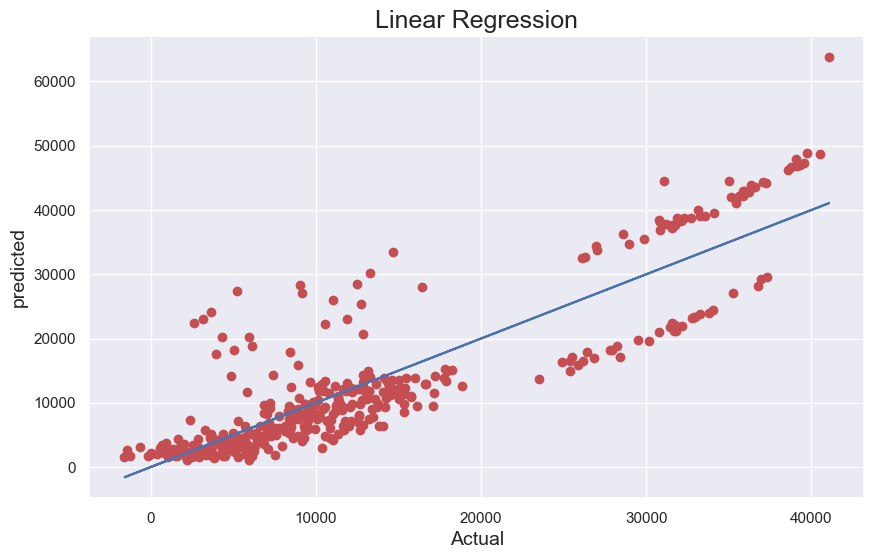

In [120]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('predicted',fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

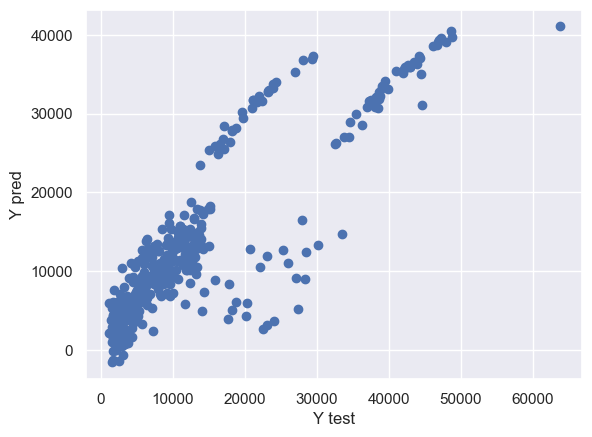

In [119]:
plt.scatter(y_test,pred_LR)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [123]:
RFR =RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.8556428627345479
R2_score on training Data:- 97.60091224797596
Mean Absolute Error:- 2539.852757916169
Mean Squarded error:- 21166265.341124274
Root Mean Squared Error:- 4600.680964935981


In [124]:
knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.828874257256119
R2_score on training Data:- 86.50867253827376
Mean Absolute Error:- 3093.263397624378
Mean Squarded error:- 25091193.592689823
Root Mean Squared Error:- 5009.111058130956


In [125]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8688050967708854
R2_score on training Data:- 90.53000443223976
Mean Absolute Error:- 2439.2551976454492
Mean Squarded error:- 19236361.885205787
Root Mean Squared Error:- 4385.927710896041


In [126]:
lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.7694456690291409
R2_score on training Data:- 74.22570918216603
Mean Absolute Error:- 4155.051839718793
Mean Squarded error:- 33804869.21059549
Root Mean Squared Error:- 5814.195491260634


In [127]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.769423370464118
R2_score on training Data:- 74.22562747381455
Mean Absolute Error:- 4156.480309024184
Mean Squarded error:- 33808138.72225901
Root Mean Squared Error:- 5814.476650762217


In [128]:
from sklearn.svm import SVR
svr=SVR()
svr=DecisionTreeRegressor()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_svr))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_svr))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score: 0.7460441570473235
R2_score on training Data:- 100.0
Mean Absolute Error:- 2786.024128231343
Mean Squarded error:- 37236099.708605565
Root Mean Squared Error:- 6102.13894537035


In [129]:
from sklearn.ensemble import ExtraTreesRegressor
etr=SVR()
etr=DecisionTreeRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_etr))
print('R2_score on training Data:-',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_etr))
print('Mean Squarded error:-',mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-" ,np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_score: 0.7443467600883658
R2_score on training Data:- 100.0
Mean Absolute Error:- 2785.7260456691542
Mean Squarded error:- 37484979.36293434
Root Mean Squared Error:- 6122.497804240876


# Cross_val_score:

In [130]:
from sklearn.model_selection import cross_val_score

In [131]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_LR)-score.mean()*100)

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
0.7472559473580954
Difference between R2 score and cross validiation score is - -73.95615314310376


In [133]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_RFR)-score1.mean()*100)

[0.85507915 0.76925314 0.87061896 0.83214523 0.85459447]
0.8363381906638937
Difference between R2 score and cross validiation score is - -82.77817620365482


In [134]:
score2 = cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_knn)-score2.mean()*100)

[0.8221881  0.7555254  0.83987794 0.8050002  0.80856984]
0.8062322958732286
Difference between R2 score and cross validiation score is - -79.79435533006675


In [135]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_GBR)-score3.mean()*100)

[0.87512718 0.79149477 0.89426987 0.84897872 0.85969284]
0.8539126745239379
Difference between R2 score and cross validiation score is - -84.5224623556229


In [136]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_GBR)-score3.mean()*100)

[0.87514246 0.79058415 0.89426987 0.84897872 0.85979333]
0.8537537033215529
Difference between R2 score and cross validiation score is - -84.5065652353844


In [137]:
score4 = cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_lasso)-score4.mean()*100)

[0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
0.7472609349374297
Difference between R2 score and cross validiation score is - -73.95664782471384


In [138]:
score5 = cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_rd)-score5.mean()*100)

[0.76124956 0.70849269 0.77774855 0.73370746 0.75510598]
0.7472608501582405
Difference between R2 score and cross validiation score is - -73.95666164535993


In [140]:
score6 = cross_val_score(svr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_svr)-score6.mean()*100)

[0.76749273 0.67614226 0.72449649 0.70462512 0.66507742]
0.7075668055054847
Difference between R2 score and cross validiation score is - -70.01063639350114


In [141]:
score7 = cross_val_score(etr,x,y)
print(score7)
print(score7.mean())
print("Difference between R2 score and cross validiation score is -", r2_score(y_test,pred_etr)-score7.mean()*100)

[0.75854653 0.68912814 0.73932577 0.72433345 0.66965846]
0.716198469793681
Difference between R2 score and cross validiation score is - -70.87550021927973


In [142]:
from sklearn.model_selection import GridSearchCV 

In [167]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],   
    'random_state': [1, 4, 10, 20]}

In [168]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5,n_jobs=1)

In [169]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'random_state': [1, 4, 10, 20]})

In [170]:
GCV.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50,
 'random_state': 20}

In [180]:
from sklearn.metrics import mean_squared_error

# Assuming x_train, y_train, and x_test are the training features, training labels, and test features, respectively.

# Creating the Final_model with specific hyperparameters
Final_model = GradientBoostingRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=50, random_state=20)

# Fitting the model to the training data
Final_model.fit(x_train, y_train)

# Making predictions on the test data
pred = Final_model.predict(x_test)

mse = mean_squared_error(y_test, pred)
mse

22647630.82088437

In [181]:
#Saving the model using .pkl (pickel)

import joblib

joblib.dump(Final_model, "Medical Cost Personal Insurance Project.pkl")

['Medical Cost Personal Insurance Project.pkl']

In [182]:
# lets load the saved model and get the predctions

model=joblib.load("Medical Cost Personal Insurance Project.pkl")

#prediction

prediction = model.predict(x_test)
prediction

array([ 8178.7702228 ,  5915.67377656, 28121.8310262 , 12059.42045475,
       34303.27080713,  6510.80586801,  1529.34657463, 15092.36538403,
        3041.48440487, 10135.90277884, 18265.41991333,  7338.97442043,
        4532.30204977, 45013.81354248, 48260.3830631 , 43416.42355814,
        9954.07510554, 42077.94983137, 11851.15871867, 24647.2351222 ,
        3570.57912462,  9014.30322812,  1934.08100837,  1668.60779873,
       11636.8218263 ,  9994.22174444, 13984.18251372,  6354.45272509,
        9480.56445287,  5823.16527704,  6994.66021526, 11866.68924616,
        4026.84051775,  4856.97740487,  4068.97057063, 10843.36729143,
        3717.92770251,  8166.75458849, 22992.11747243, 38880.44852887,
        5849.86701828,   929.0106929 , 10565.23016642, 16723.63385577,
        5736.34523063, 13420.33616561, 17166.38653109,  5917.37497627,
       41164.75668685,  6362.45931818, 13074.98675786,  2762.03699424,
        6085.04805358,  2217.68552257, 10817.60667385, 12447.03958091,
      

In [183]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

,Predicted,Original
0,8178.770223,9095.06825
1,5915.673777,5272.17580
2,28121.831026,29330.98315
3,12059.420455,9301.89355
4,34303.270807,33750.29180
...,...,...
397,13479.825004,9541.69555
398,4577.567378,4399.73100
399,5753.808043,2200.83085
400,12108.491253,11363.28320


# End...........................